TLE matching for Lucky-7 among the TLEs for 2019-038 launch using on-board GPS data.

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from skyfield.sgp4lib import EarthSatellite
from skyfield.constants import AU_KM, DAY_S
from skyfield.functions import length_of
import skyfield.api
import tabulate
from IPython.display import HTML, display
import datetime
import astropy.coordinates
import astropy.units
import astropy.time
import pymap3d

SpaceTrack latest TLEs for objects 44387 - 44419 retrieved on 2019-07-25.

In [2]:
tle_lines = """1 44387U 19038A   19206.33263458 -.00000022  00000-0  89680-5 0  9990
2 44387  98.5700 168.8669 0002514  51.7553 308.3852 14.23333186  2857
1 44388U 19038B   19206.36606677  .00001117  00000-0  10440-3 0  9999
2 44388  97.6849 168.1317 0022451 173.5235 186.6281 14.95946237  2991
1 44389U 19038C   19206.35937814 -.00000014  00000-0  38734-5 0  9993
2 44389  97.6827 168.1189 0021313 165.8587 194.3236 14.96428939  2996
1 44390U 19038D   19206.35871831  .00000027  00000-0  75041-5 0  9996
2 44390  97.6805 168.1107 0021062 166.1919 193.9883 14.96478435  2997
1 44391U 19038E   19206.35779695  .00000050  00000-0  95274-5 0  9998
2 44391  97.6825 168.1203 0021054 166.3223 193.8574 14.96548603  2911
1 44392U 19038G   19205.88690027 +.00000392 +00000-0 +26353-4 0  9997
2 44392 097.4910 167.4713 0021806 178.9933 181.1345 15.12195063002817
1 44393U 19038H   19206.15303022  .00000320  00000-0  22257-4 0  9995
2 44393  97.4910 167.7292 0022189 177.9175 182.2152 15.12083062  2975
1 44394U 19038J   19205.82309084  .00000380  00000-0  25812-4 0  9999
2 44394  97.4909 167.4032 0022186 179.3942 180.7319 15.12010425  2924
1 44395U 19038K   19206.15896261  .00000219  00000-0  16598-4 0  9997
2 44395  97.4895 167.7238 0025435 174.7112 185.4392 15.11626007  2963
1 44396U 19038L   19206.42148378  .00001396  00000-0  84950-4 0  9991
2 44396  97.4883 167.9801 0024845 173.5362 186.6271 15.11813598  3005
1 44397U 19038M   19206.16041197  .00000424  00000-0  28678-4 0  9990
2 44397  97.4910 167.7190 0025923 172.6862 187.4752 15.11519292  2971
1 44398U 19038N   19206.15963198  .00000636  00000-0  41021-4 0  9996
2 44398  97.4901 167.7249 0025611 174.4923 185.6594 15.11582531  2979
1 44399U 19038P   19206.15922158  .00000271  00000-0  19634-4 0  9998
2 44399  97.4912 167.7222 0024945 179.1368 180.9909 15.11606882  2971
1 44400U 19038Q   19205.89416108  .00000254  00000-0  18674-4 0  9998
2 44400  97.4910 167.4617 0025520 173.7123 186.4433 15.11627714  2932
1 44401U 19038R   19206.15776714  .00000423  00000-0  28468-4 0  9991
2 44401  97.4910 167.7227 0025373 172.4970 187.6645 15.11722205  2978
1 44402U 19038S   19205.89270865 +.00000643 +00000-0 +41242-4 0  9997
2 44402 097.4889 167.4639 0025062 174.9579 185.1909 15.11748403002935
1 44403U 19038T   19205.89267484 +.00000788 +00000-0 +49749-4 0  9991
2 44403 097.4920 167.4613 0023765 178.1468 181.9855 15.11754092002930
1 44404U 19038U   19205.89172683 +.00000447 +00000-0 +29821-4 0  9999
2 44404 097.4909 167.4648 0022470 179.8087 180.3156 15.11819815002935
1 44405U 19038V   19205.89147434  .00000577  00000-0  37298-4 0  9997
2 44405  97.4877 167.4621 0024938 174.5796 185.5710 15.11844133  2935
1 44406U 19038W   19205.82562047 +.00000315 +00000-0 +22120-4 0  9990
2 44406 097.4909 167.3999 0024970 173.8943 186.2596 15.11811566002913
1 44407U 19038X   19205.89232946 +.00000457 +00000-0 +30400-4 0  9997
2 44407 097.4916 167.4598 0023734 178.5508 181.5795 15.11774397002924
1 44408U 19038Y   19205.89120858 +.00000132 +00000-0 +11466-4 0  9997
2 44408 097.4904 167.4577 0023490 178.9201 181.2085 15.11854096002937
1 44409U 19038Z   19205.89059028 +.00000930 +00000-0 +57706-4 0  9991
2 44409 097.4873 167.4616 0024823 174.2194 185.9328 15.11918345002937
1 44410U 19038AA  19205.89061514 +.00000571 +00000-0 +36935-4 0  9998
2 44410 097.4909 167.4663 0022512 179.1061 181.0213 15.11908437002932
1 44411U 19038AB  19206.35696713  .00000567  00000-0  36945-4 0  9992
2 44411  97.4929 167.9161 0023884 177.1778 182.9592 15.11677382  2672
1 44412U 19038AC  19205.89255725  .00000422  00000-0  28384-4 0  9993
2 44412  97.4908 167.4637 0022932 179.0776 181.0501 15.11755112  2628
1 44413U 19038AD  19206.35489650  .00000743  00000-0  47013-4 0  9998
2 44413  97.4910 167.9135 0023659 176.7496 183.3893 15.11839459  3009
1 44414U 19038AE  19205.89167858 +.00000266 +00000-0 +19261-4 0  9994
2 44414 097.4911 167.4659 0023970 179.6795 180.4455 15.11820252002469
1 44419U 19038F   19206.15083009  .00000356  00000-0  24253-4 0  9991
2 44419  97.4911 167.7323 0021800 178.0519 182.0801 15.12252398  2972"""

tles = [EarthSatellite(*z) for z in zip(tle_lines.split('\n')[::2], tle_lines.split('\n')[1::2])]

Load Lucky-7 GPS data taken on 2019-07-22 from 14:05 to 22:29 UTC.

In [3]:
lucky7_gps = np.loadtxt('lucky7_posW15.csv', delimiter = ',')
# filter out invalid positions (X = Y = Z = 0)
invalid_gps = np.all(lucky7_gps[:,:3] == 0, axis = 1)
lucky7_gps = lucky7_gps[~invalid_gps,:]
lucky7_gps[:, :3] *= 1e-3 # convert to km

ts = skyfield.api.load.timescale()
gps_to_tai_offset_days = 19/DAY_S
gps_week2063_jd_tai = 2458685.5 + gps_to_tai_offset_days

t = ts.tai(jd = gps_week2063_jd_tai + lucky7_gps[:,3]/DAY_S)
t[0].utc_datetime(), t[-1].utc_datetime()

(datetime.datetime(2019, 7, 22, 14, 5, 49, 640000, tzinfo=<UTC>),
 datetime.datetime(2019, 7, 22, 22, 29, 50, 650000, tzinfo=<UTC>))

Compute and show the 10 TLEs that best match the GPS data.

In [4]:
tles_ITRF = np.array([tle.ITRF_position_velocity_error(t)[0] * AU_KM  for tle in tles])
rms_error = np.sqrt(np.average(np.sum((tles_ITRF - lucky7_gps[:,:3].transpose().reshape(1,3,-1))**2, axis = 1), axis = 1))
output = [(tles[j].model.satnum, tles[j].epoch.utc_datetime().strftime('%Y-%m-%d %H:%M'), rms_error[j]) for j in np.argsort(rms_error)[:10]]
display(HTML(tabulate.tabulate(output, headers = ('NORAD', 'TLE epoch', 'RMS error (km)'), tablefmt = 'html')))

NORAD,TLE epoch,RMS error (km)
44406,2019-07-24 19:48,8.67616
44404,2019-07-24 21:24,51.3546
44414,2019-07-24 21:24,82.1203
44396,2019-07-25 10:06,102.769
44413,2019-07-25 08:31,125.231
44405,2019-07-24 21:23,197.748
44407,2019-07-24 21:24,301.299
44408,2019-07-24 21:23,359.371
44412,2019-07-24 21:25,433.198
44403,2019-07-24 21:25,508.088


In [5]:
x, v = tles[np.argmin(rms_error)].ITRF_position_velocity_error(t[0])[:2]
x * AU_KM

array([2936.51748892, -130.58319006, 6253.5805226 ])

In [6]:
v * AU_KM / DAY_S

array([-6.65380335, -2.24791491,  3.05210206])

In [7]:
t[0].tai - 2430000.0

28687.087808333337

In [8]:
t[-1].tai - 2430000.0

28687.43782002339

It seems there is discontinuity in GPS measurements between measurement 329 and 330. This is probably caused by some jump in the GPS clock. The measurments after this discontinuity are rejected in GMAT orbit determination.

In [9]:
t[330].tai - 2430000.0

28687.3461533566

In [10]:
tai_modjulian = t.tai - 2430000.0

In [11]:
gps_pos = tles_ITRF[np.argmin(rms_error),...]

In [12]:
with open('/tmp/gpsl7_data.gmd', 'w') as f:
    for j in range(tai_modjulian.size):
        pos = lucky7_gps[j,:3]
        f.write(f'{tai_modjulian[j]} GPS_PosVec 9014 0 {pos[0]} {pos[1]} {pos[2]}\n')

Read orbit determination report to compute residuals.

In [13]:
with open('l7_estimation_report') as f:
    report = f.readlines()
    
iterations = [(j, int(l.split()[2].strip(':'))) for j,l in enumerate(report) if l.split()[1:2] == ['ITERATION']]
last_iter = max([i[1] for i in iterations])-1
start_line = [i[0] for i in iterations if i[1] == last_iter][2]
end_line = [i[0] for i in iterations if i[1] == last_iter + 1][0]
residual_lines = [l for l in report[start_line:end_line] if l.split()[0:1] == [str(last_iter)]]

ecef_position = np.array([float(l.split()[-2]) for l in residual_lines]).reshape((-1,3))
ecef_residual = lucky7_gps[:,:3] - ecef_position

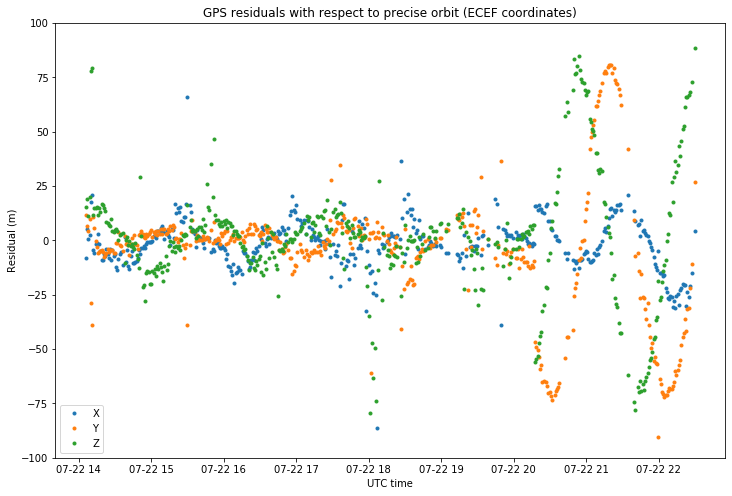

In [14]:
plt.figure(figsize = (12,8), facecolor = 'w')
plt.plot(t.utc_datetime(), ecef_residual * 1e3, '.');
plt.ylim((-100,100))
plt.xlabel('UTC time')
plt.ylabel('Residual (m)')
plt.legend(['X', 'Y', 'Z'])
plt.title('GPS residuals with respect to precise orbit (ECEF coordinates)');

Read orbit propagation to compute VBN frame.

In [15]:
with open('l7_eph.oem') as f:
    oem_lines = f.readlines()
oem_utc = np.array([np.datetime64(l.split()[0]) for l in oem_lines[18:]])
oem_state = np.array([l.split()[1:] for l in oem_lines[18:]], dtype = 'float')
timestamp = ((oem_utc - np.datetime64('1970-01-01T00:00:00'))/ np.timedelta64(1, 's'))
oem_t = ts.utc([datetime.datetime.utcfromtimestamp(t).replace(tzinfo = skyfield.api.utc) for t in timestamp])
oem_tai_modjulian = oem_t.tai - 2430000.0

Convert ECEF residuals to ECI using Astropy.

In [16]:
r = astropy.coordinates.CartesianRepresentation(ecef_residual, xyz_axis = 1, unit = astropy.units.km)
obs_time = astropy.time.Time(t.utc_datetime())
eci_residual = np.array(astropy.coordinates.ITRS(r, obstime = obs_time).transform_to(astropy.coordinates.GCRS(obstime = obs_time)).cartesian.xyz).transpose()

Interpolate orbit propagation to GPS measurement timestamps.

In [17]:
oem_x = np.interp(tai_modjulian, oem_tai_modjulian, oem_state[:,0])
oem_y = np.interp(tai_modjulian, oem_tai_modjulian, oem_state[:,1])
oem_z = np.interp(tai_modjulian, oem_tai_modjulian, oem_state[:,2])
oem_vx = np.interp(tai_modjulian, oem_tai_modjulian, oem_state[:,3])
oem_vy = np.interp(tai_modjulian, oem_tai_modjulian, oem_state[:,4])
oem_vz = np.interp(tai_modjulian, oem_tai_modjulian, oem_state[:,5])
oem_eci = np.array([oem_x,oem_y,oem_z,oem_vx,oem_vy,oem_vz]).transpose()

Compute rotation matrices from ECI to VNB frames.

In [18]:
def crossprod(x,y):
    return np.stack([x[:,1]*y[:,2] - x[:,2]*y[:,1], x[:,2]*y[:,0]-x[:,0]*y[:,2], x[:,0]*y[:,1]-x[:,1]*y[:,0]], axis = 1)

V = oem_eci[:,3:]
V = V / np.sqrt(np.sum(V**2, axis = 1)).reshape((-1,1))
R = oem_eci[:,:3]
R = R / np.sqrt(np.sum(R**2, axis = 1)).reshape((-1,1))
N = crossprod(V,R)
B = crossprod(V,N)
VNB_rot = np.stack((V,N,B), axis = 1)

Apply rotation matrices to ECI residuals to get VNB residuals.

In [19]:
vnb_residual = np.einsum('ijk,ik->ij', VNB_rot, eci_residual)

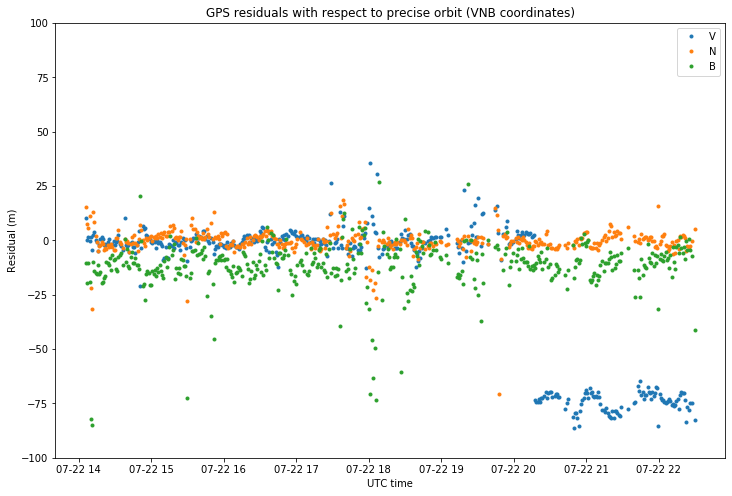

In [20]:
plt.figure(figsize = (12,8), facecolor = 'w')
plt.plot(t.utc_datetime(), vnb_residual * 1e3, '.');
plt.ylim((-100,100))
plt.xlabel('UTC time')
plt.ylabel('Residual (m)')
plt.legend(['V', 'N', 'B'])
plt.title('GPS residuals with respect to precise orbit (VNB coordinates)');

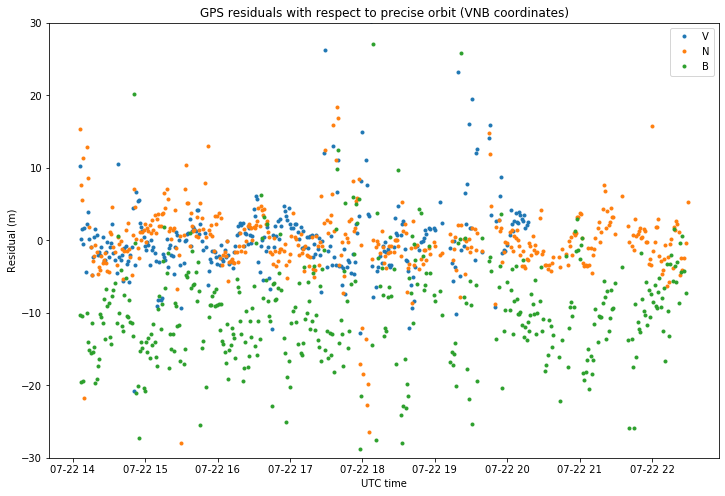

In [21]:
plt.figure(figsize = (12,8), facecolor = 'w')
plt.plot(t.utc_datetime(), vnb_residual * 1e3, '.');
plt.ylim((-30,30))
plt.xlabel('UTC time')
plt.ylabel('Residual (m)')
plt.legend(['V', 'N', 'B'])
plt.title('GPS residuals with respect to precise orbit (VNB coordinates)');